In [2]:
%load_ext autoreload
%autoreload 2
import jax.numpy as jnp
import numpy as np

import pymudokon as pm

In [3]:
# dam
dam_height = 2.0
dam_length = 4.0

# material parameters
rho = 997.5
bulk_modulus = 2.0 * 10**6
mu = 0.001


# gravity
g = -9.81


# USL
alpha = 0.99

# background grid
origin, end = jnp.array([0.0, 0.0]), jnp.array([6.0, 6.0])


cell_size = 6/69
# timestep
c = np.sqrt(bulk_modulus / rho)
dt = 0.1 * cell_size / c

particles_per_cell = 2

total_steps = 80000
output_steps = 1000
print(cell_size, dt, total_steps)



0.08695652173913043 0.00019419749073154168 80000


In [4]:
nodes = pm.Nodes.register(origin=origin, end=end, node_spacing=cell_size, particles_per_cell=particles_per_cell)
print(nodes.grid_size)

[70 70]


In [5]:
sep = cell_size / 2
x = np.arange(0, dam_length + sep, sep) + 3.5 * sep
y = np.arange(0, dam_height + sep, sep) + 3.5 * sep
xv, yv = np.meshgrid(x, y)
pnts = np.array(list(zip(xv.flatten(), yv.flatten()))).astype(np.float64)

particles = pm.Particles.register(positions=jnp.array(pnts), original_density=rho)

In [6]:
print(particles.positions.shape)

(4464, 2)


(0.0, 6.0)

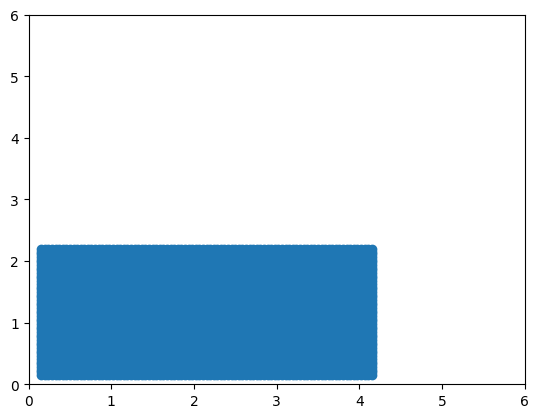

In [7]:
import matplotlib.pyplot as plt

plt.plot(particles.positions[:, 0], particles.positions[:, 1], 'o')
plt.xlim(0, 6)
plt.ylim(0, 6)

In [8]:
print(particles.positions.shape)

(4464, 2)


In [9]:

particles = particles.calculate_volume(cell_size,particles_per_cell=particles_per_cell)
particles = particles.replace(masses=997.5 * particles.volumes)

In [10]:

nodes = pm.Nodes.register(origin=origin, end=end, node_spacing=cell_size, particles_per_cell=particles_per_cell)

# material = pm.LinearIsotropicElastic.register(E=1000.0, nu=0.3, num_particles=len(pnts), dim=2)

material = pm.NewtonFluid.register(K=bulk_modulus, viscosity=mu)

shapefunctions = pm.CubicShapeFunction.register(len(pnts), 2)
nodes = shapefunctions.set_nodes_species(nodes)
# shapefunctions = pm.LinearShapeFunction.register(len(pnts), 2)

In [11]:
# nodes.ids_grid[0,:]

In [12]:


gravity = pm.Gravity.register(gravity=jnp.array([0.0, g]))
box = pm.DirichletBox.register()

usl = pm.USL.register(
    particles=particles,
    nodes=nodes,
    materials=[material],
    forces=[gravity,box],
    shapefunctions=shapefunctions,
    alpha=alpha,
    dt=dt,
)

# cell_size = 1.0 / 80
# c = np.sqrt(bulk_modulus / rho)
# dt = 0.1 * cell_size / c


[[1 1]
 [1 1]
 [1 1]]


In [13]:
pl = pm.plotter_create(bounds=[0.0, 6.0, 0.0, 6.0,0,0])

pl, cloud1 = pm.plotter_add_particles(pl, particles,clim=[0,0.5],point_size=5)


pl.show()

Widget(value='<iframe src="http://localhost:39059/index.html?ui=P_0x7fe4dc1abca0_0&reconnect=auto" class="pyvi…

In [14]:
def some_callback(package):
    global pl, cloud1, cloud2, grid
    usl, step = package
    cloud1 = pm.plotter_update_particles(cloud1, usl.particles)
    pl = pm.update_plotter_animation(pl)
    print(f"output {step}",end='\r')

usl = usl.solve(
    num_steps=total_steps,
    output_step=output_steps,
    output_function=some_callback
)


In [15]:
pl.close()

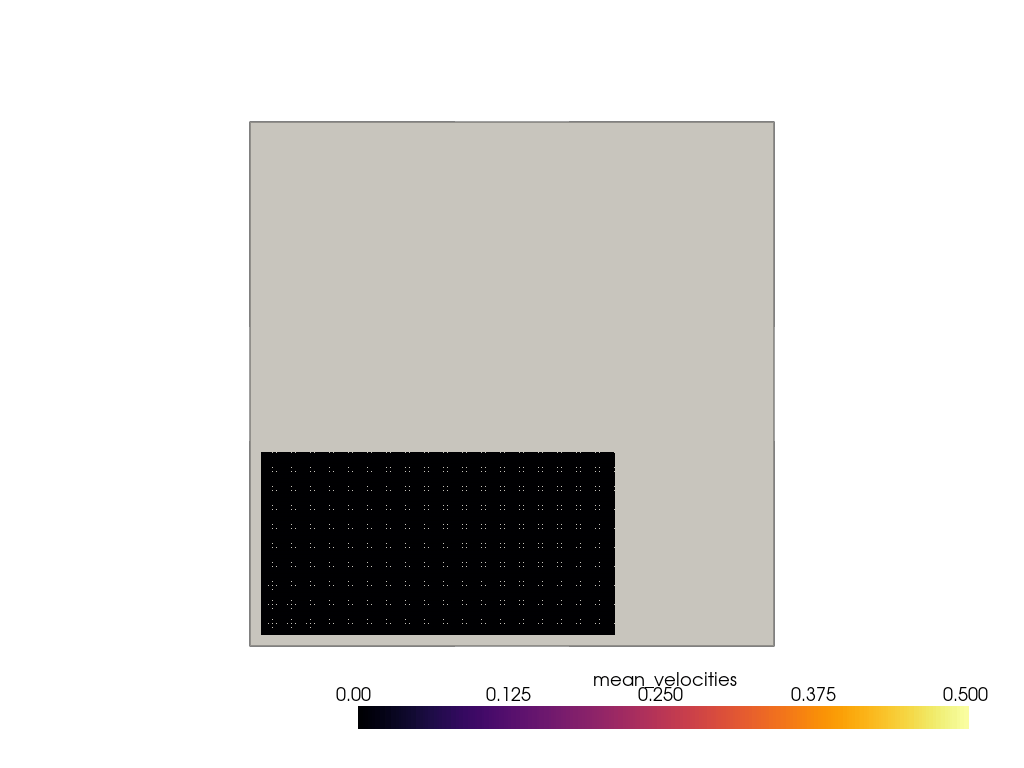

In [16]:
from IPython.display import Image

Image(filename="out.gif")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
x, y = np.meshgrid(np.arange(0,1,0.1), np.arange(0,1,0.1))

In [ ]:
zipped_array = np.array(list(zip(x.flatten(), y.flatten())))

In [ ]:
zipped_array_grid = zipped_array.reshape(10,10,2)

plt.scatter(zipped_array[:,0], zipped_array[:,1])



# plt.scatter(zipped_array_grid[0,:,0], zipped_array_grid[0,:,1], c='r')
# plt.scatter(zipped_array_grid[-1,:,0], zipped_array_grid[-1,:,1],c='r')
# plt.scatter(zipped_array_grid[:,0,0], zipped_array_grid[:,0,1],c='r')
# plt.scatter(zipped_array_grid[:,-1,0], zipped_array_grid[:,-1,1],c='r')


# plt.scatter(zipped_array_grid[1,1:-1,0], zipped_array_grid[1,1:-1,1], c='b') # 0 + h at x0
# plt.scatter(zipped_array_grid[1:-1,1,0], zipped_array_grid[1:-1,1,1],c='g') # 0 + h at y0

# plt.scatter(zipped_array_grid[1:-1,-2,0], zipped_array_grid[1:-1,-2,1],c='g') # L -1 at y1
# plt.scatter(zipped_array_grid[-2,1:-1,0], zipped_array_grid[-2,1:-1,1],c='g') # L -1 at x1